In [11]:
#import findspark
#import pandas as pd
#findspark.init()

In [55]:
from datetime import datetime, timedelta
import holidays

In [33]:
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark import SparkContext

sc = SparkContext()
sqlContext = SQLContext(sc)
import matplotlib.pyplot as plt
 

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-4-680f0a4b23a6>:3 

In [7]:
data_path = '/Users/joseangelvelasco/GoogleDrive/DataScience/python/Data Science/dataanalytics.predictive/data/anual_data_2018.csv'

In [8]:
data_input = sqlContext.read.format("com.databricks.spark.csv").options( header = True, inferSchema = True, sep=';',  line_terminator='\n').load( path=data_path)

In [9]:
data_input.printSchema()

root
 |-- ID_SEGMENT: integer (nullable = true)
 |-- COD_LABORALIDAD: integer (nullable = true)
 |-- FECHA: timestamp (nullable = true)
 |-- MES: integer (nullable = true)
 |-- HORA: integer (nullable = true)
 |-- MINUTO: integer (nullable = true)
 |-- CANTIDAD_PREC: integer (nullable = true)
 |-- TOTAL_VEHICULOS: double (nullable = true)
 |-- TOTAL_VEHICULOS_1: double (nullable = true)
 |-- TOTAL_VEHICULOS_2: double (nullable = true)
 |-- TOTAL_VEHICULOS_3: double (nullable = true)
 |-- TOTAL_VEHICULOS_4: double (nullable = true)
 |-- TOTAL_VEHICULOS_5: double (nullable = true)
 |-- TOTAL_VEHICULOS_6: double (nullable = true)
 |-- TOTAL_VEHICULOS_7: double (nullable = true)
 |-- TOTAL_VEHICULOS_8: double (nullable = true)
 |-- TOTAL_VEHICULOS_9: double (nullable = true)
 |-- TOTAL_VEHICULOS_10: double (nullable = true)
 |-- TOTAL_VEHICULOS_11: double (nullable = true)
 |-- TOTAL_VEHICULOS_12: double (nullable = true)
 |-- TOTAL_VEHICULOS_13: double (nullable = true)
 |-- TOTAL_VEHICUL

In [13]:
#anual_data = sqlContext.read.format("com.databricks.spark.csv").options( header = True, sep=';',  line_terminator='\n').schema(data_input.schema).load( path='C:\\Users\\yolan\\Documents\\indra\\dataanalytics.predictive\\data\\anual_data_2018.csv')

In [14]:
#anual_data.printSchema()

In [16]:
data_input.count()

1390512

## Agregación mensual en semana 
####  calculada como media de los dias de la semana del mes

In [18]:

data_input.registerTempTable("data_input")

In [19]:
df = sqlContext.table("data_input")
df.select('FECHA').show(2)

+-------------------+
|              FECHA|
+-------------------+
|2018-01-01 00:00:00|
|2018-01-01 00:00:00|
+-------------------+
only showing top 2 rows



In [20]:
df = df.withColumn("Month", month('FECHA')).withColumn("Weekday", dayofweek('FECHA')).withColumn("Hour", hour("FECHA")).withColumn("Minute", minute("FECHA"))
df.head(2)

[Row(ID_SEGMENT=1, COD_LABORALIDAD=4, FECHA=datetime.datetime(2018, 1, 1, 0, 0), MES=1, HORA=0, MINUTO=0, CANTIDAD_PREC=0, TOTAL_VEHICULOS=46.0, TOTAL_VEHICULOS_1=44.0, TOTAL_VEHICULOS_2=9.0, TOTAL_VEHICULOS_3=7.0, TOTAL_VEHICULOS_4=2.0, TOTAL_VEHICULOS_5=11.0, TOTAL_VEHICULOS_6=24.0, TOTAL_VEHICULOS_7=8.0, TOTAL_VEHICULOS_8=7.0, TOTAL_VEHICULOS_9=15.0, TOTAL_VEHICULOS_10=21.0, TOTAL_VEHICULOS_11=17.0, TOTAL_VEHICULOS_12=34.0, TOTAL_VEHICULOS_13=36.0, TOTAL_VEHICULOS_14=33.0, TOTAL_VEHICULOS_15=48.0, TOTAL_VEHICULOS_16=48.0, TOTAL_VEHICULOS_17=53.0, TOTAL_VEHICULOS_18=31.0, TOTAL_VEHICULOS_19=42.0, TOTAL_VEHICULOS_20=45.0, TOTAL_VEHICULOS_21=59.0, TOTAL_VEHICULOS_22=68.0, TOTAL_VEHICULOS_23=86.0, TOTAL_VEHICULOS_24=75.0, Month=1, Weekday=2, Hour=0, Minute=0),
 Row(ID_SEGMENT=2, COD_LABORALIDAD=4, FECHA=datetime.datetime(2018, 1, 1, 0, 0), MES=1, HORA=0, MINUTO=0, CANTIDAD_PREC=0, TOTAL_VEHICULOS=49.0, TOTAL_VEHICULOS_1=11.0, TOTAL_VEHICULOS_2=9.0, TOTAL_VEHICULOS_3=3.0, TOTAL_VEHICULOS

In [21]:
df_weekday_avg = df.groupBy("ID_SEGMENT","Month","Weekday","Hour", "Minute").avg('TOTAL_VEHICULOS')
df_weekday_avg.head(2)
pd_df_weekday_avg = df_weekday_avg.toPandas()

In [22]:
df.count()

1390512

In [23]:
pd_df_weekday_avg.loc[pd_df_weekday_avg['Month']==2].sort_values(["ID_SEGMENT","Weekday","Hour","Minute"]).head(10)

,ID_SEGMENT,Month,Weekday,Hour,Minute,avg(TOTAL_VEHICULOS)
11134,1,2,1,0,0,33.00
1717,1,2,1,0,15,26.25
97817,1,2,1,0,30,19.00
261477,1,2,1,0,45,22.25
34897,1,2,1,1,0,11.25
110354,1,2,1,1,15,10.75
15988,1,2,1,1,30,11.75
42567,1,2,1,1,45,12.75
154772,1,2,1,2,0,11.75
121504,1,2,1,2,15,9.50


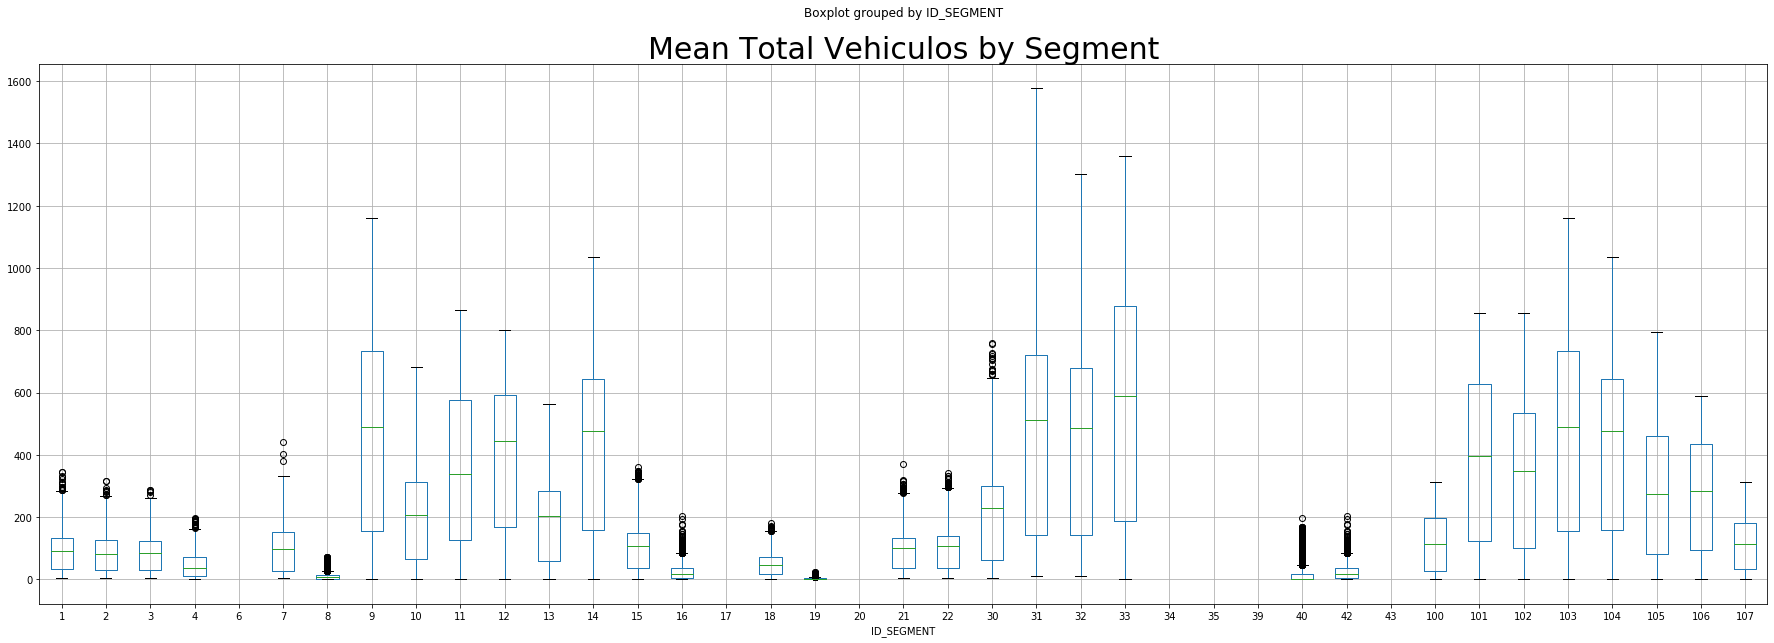

In [27]:
pd_df_weekday_avg.boxplot(column=('avg(TOTAL_VEHICULOS)'), by="ID_SEGMENT", figsize=(30,10))
plt.title('Mean Total Vehiculos by Segment',  fontsize=30)
plt.show()

In [30]:
pd_df_weekday_avg.to_csv("reference_month_week.csv")

## Clusterización por código de laboralidad

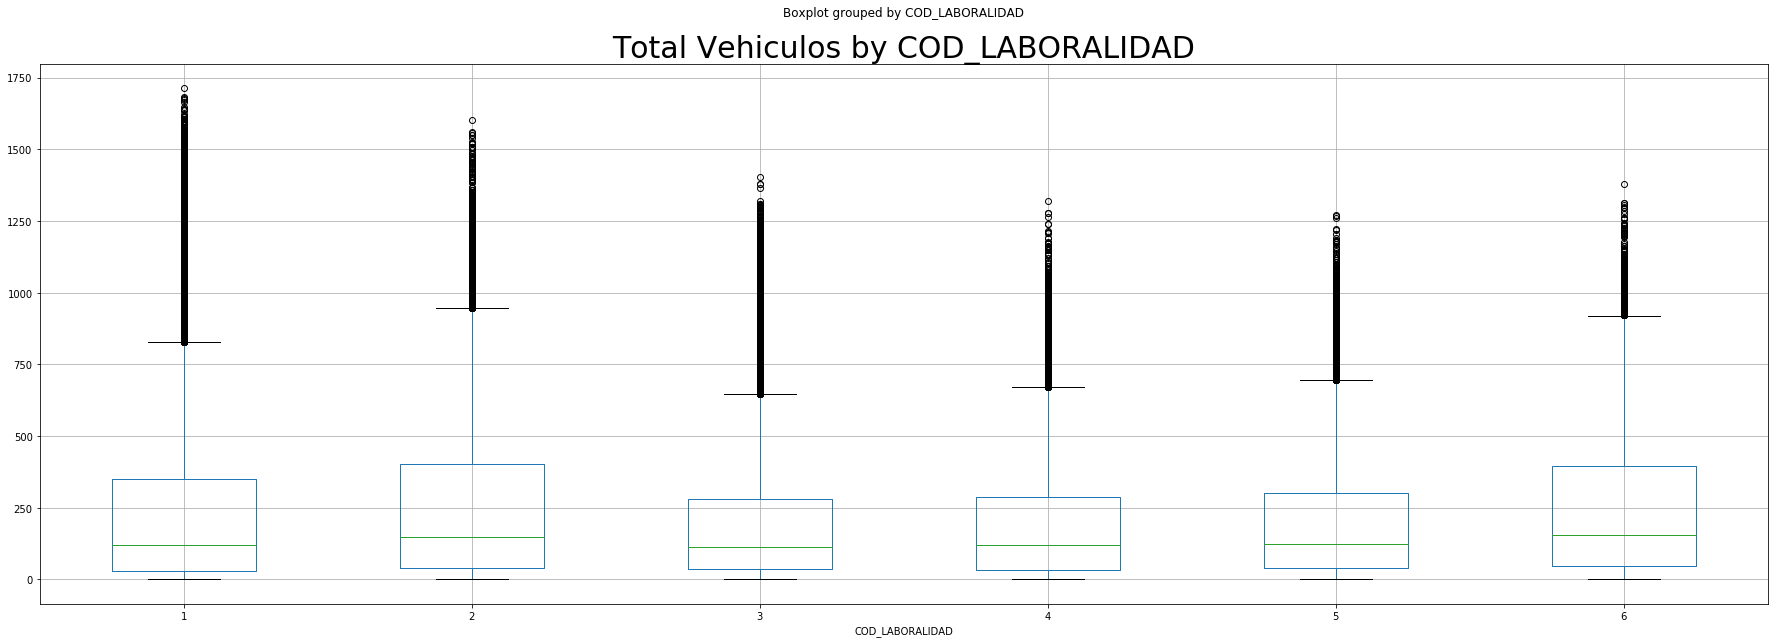

In [25]:
df.toPandas().boxplot(column=('TOTAL_VEHICULOS'), by="COD_LABORALIDAD", figsize=(30,10))
plt.title('Total Vehiculos by COD_LABORALIDAD',  fontsize=30)
plt.show()

In [28]:
df_aux = df[['COD_LABORALIDAD','TOTAL_VEHICULOS']].toPandas()

Comentarios:
En esta visualizacion se puede observar que los codigos 5,6,7 presentan más valores atípicos (desviación respecto a la media)

In [29]:
for i in range(1,7):
    print("------------> Statistics for COD_LABORALIDAD: " + str(i) )
    display(df_aux.loc[df_aux['COD_LABORALIDAD']==i]['TOTAL_VEHICULOS'].describe())

------------> Statistics for COD_LABORALIDAD: 1


count    541983.000000
mean        232.278319
std         266.676212
min           0.000000
25%          30.000000
50%         121.000000
75%         349.000000
max        1712.000000
Name: TOTAL_VEHICULOS, dtype: float64

------------> Statistics for COD_LABORALIDAD: 2


count    120906.000000
mean        257.478942
std         279.744031
min           0.000000
25%          39.000000
50%         148.000000
75%         402.000000
max        1602.000000
Name: TOTAL_VEHICULOS, dtype: float64

------------> Statistics for COD_LABORALIDAD: 3


count    251108.000000
mean        193.363346
std         215.275926
min           0.000000
25%          35.000000
50%         112.000000
75%         280.000000
max        1402.000000
Name: TOTAL_VEHICULOS, dtype: float64

------------> Statistics for COD_LABORALIDAD: 4


count    38084.000000
mean       201.699690
std        224.785178
min          0.000000
25%         33.000000
50%        119.000000
75%        288.000000
max       1319.000000
Name: TOTAL_VEHICULOS, dtype: float64

------------> Statistics for COD_LABORALIDAD: 5


count    31562.000000
mean       207.970946
std        222.290616
min          0.000000
25%         40.000000
50%        125.000000
75%        302.000000
max       1270.000000
Name: TOTAL_VEHICULOS, dtype: float64

------------> Statistics for COD_LABORALIDAD: 6


count    20581.000000
mean       253.204995
std        262.614897
min          0.000000
25%         45.000000
50%        153.000000
75%        395.000000
max       1378.000000
Name: TOTAL_VEHICULOS, dtype: float64

Aqui comparamos en detalle las estadísticas representadas gráficamente en el boxplot anterior. Comparamos las medias y desviación estándar de la variable TOTAL_VEHICULOS por código de laboralidad. En caso de encontrar códigos de laboralidad con estadísticas semejantes, se podría hacer un estudio por segmento para ver si siguen siendo semejantes y se podrían agrupar en un sólo cluster

### Exploración de datos por segmento - SEGMENTO 1

In [30]:
df = data_input.toPandas()

In [31]:
df_cod1_seg1 = df.loc[(df['ID_SEGMENT']==1) & (df['COD_LABORALIDAD']==1)]

In [32]:
df_cod1_seg1.count()[0]

18528

In [35]:
df_cod1_seg1.index = pd.to_datetime(df_cod1_seg1['FECHA']).map(lambda x: x.strftime('%H:%M:%S'))
df_cod1_seg1.index[:5]

Index(['05:45:00', '06:00:00', '06:15:00', '06:30:00', '06:45:00'], dtype='object', name='FECHA')

### Comparativa de variación de TOTAL_VEHICULOS para el mismo cod laboralidad de un mes a otro
#### ¿ Se mantiene la curva patrón por cod laboralidad en distintos meses ?

### MES 1 - ENERO

#### Comparamos los dias del segmento 1 con mismo codigo laboralidad 1 - MES 1

In [36]:
rows_per_day=int(((60/15)*24))
df_month_1=df_cod1_seg1.loc[df_cod1_seg1.FECHA.dt.month==1]
days_in_month1 = df_month_1.count()[0]/rows_per_day # dias con código laboralidad 1 en el mes 1
days_code1_month1=(df_month_1.FECHA.dt.day).unique()

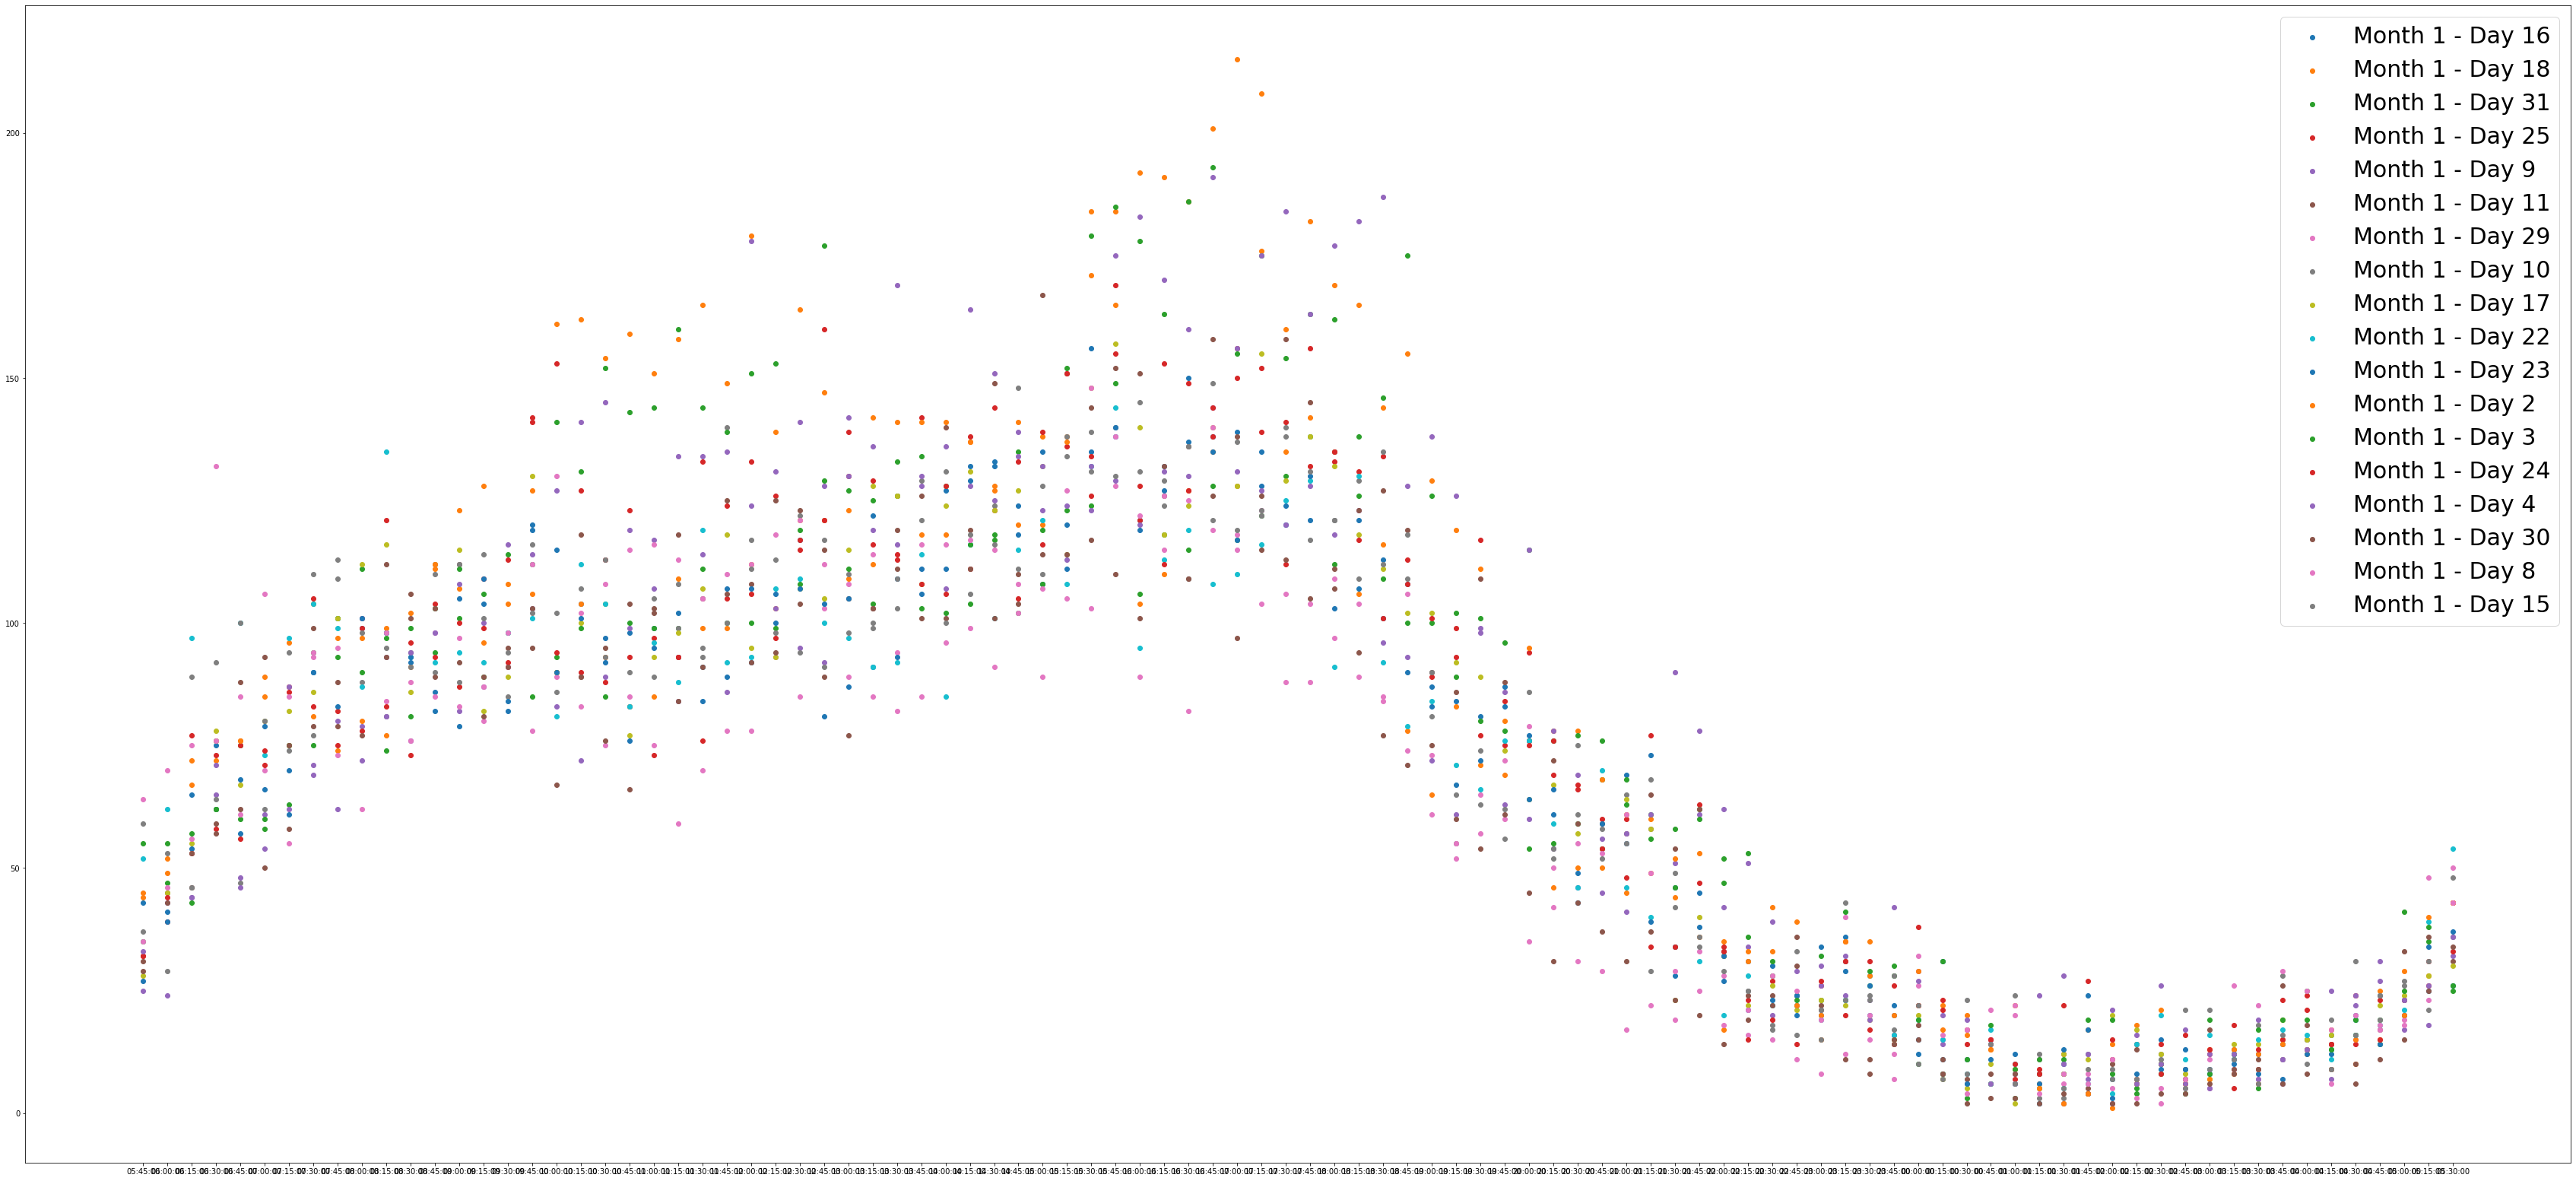

In [44]:
plt.figure(figsize=(60,28))
for day in days_code1_month1:
    plt.scatter(df_month_1.loc[df_month_1.FECHA.dt.day==day].index,
             df_month_1.loc[df_month_1.FECHA.dt.day==day].TOTAL_VEHICULOS,
             marker='o',
             label=str("Month 1 - Day " + str(day)))
plt.legend(loc='best',  fontsize=30)
plt.show()


### MES 2 - FEBRERO

#### Comparamos los dias del segmento 1 con mismo codigo laboralidad 1 - MES 2

In [46]:
rows_per_day=int(((60/15)*24))
df_month_2=df_cod1_seg1.loc[df_cod1_seg1.FECHA.dt.month==2]
days_in_month2 = df_month_2.count()[0]/rows_per_day # dias con código laboralidad 1 en el mes 1
days_code1_month2=(df_month_2.FECHA.dt.day).unique()

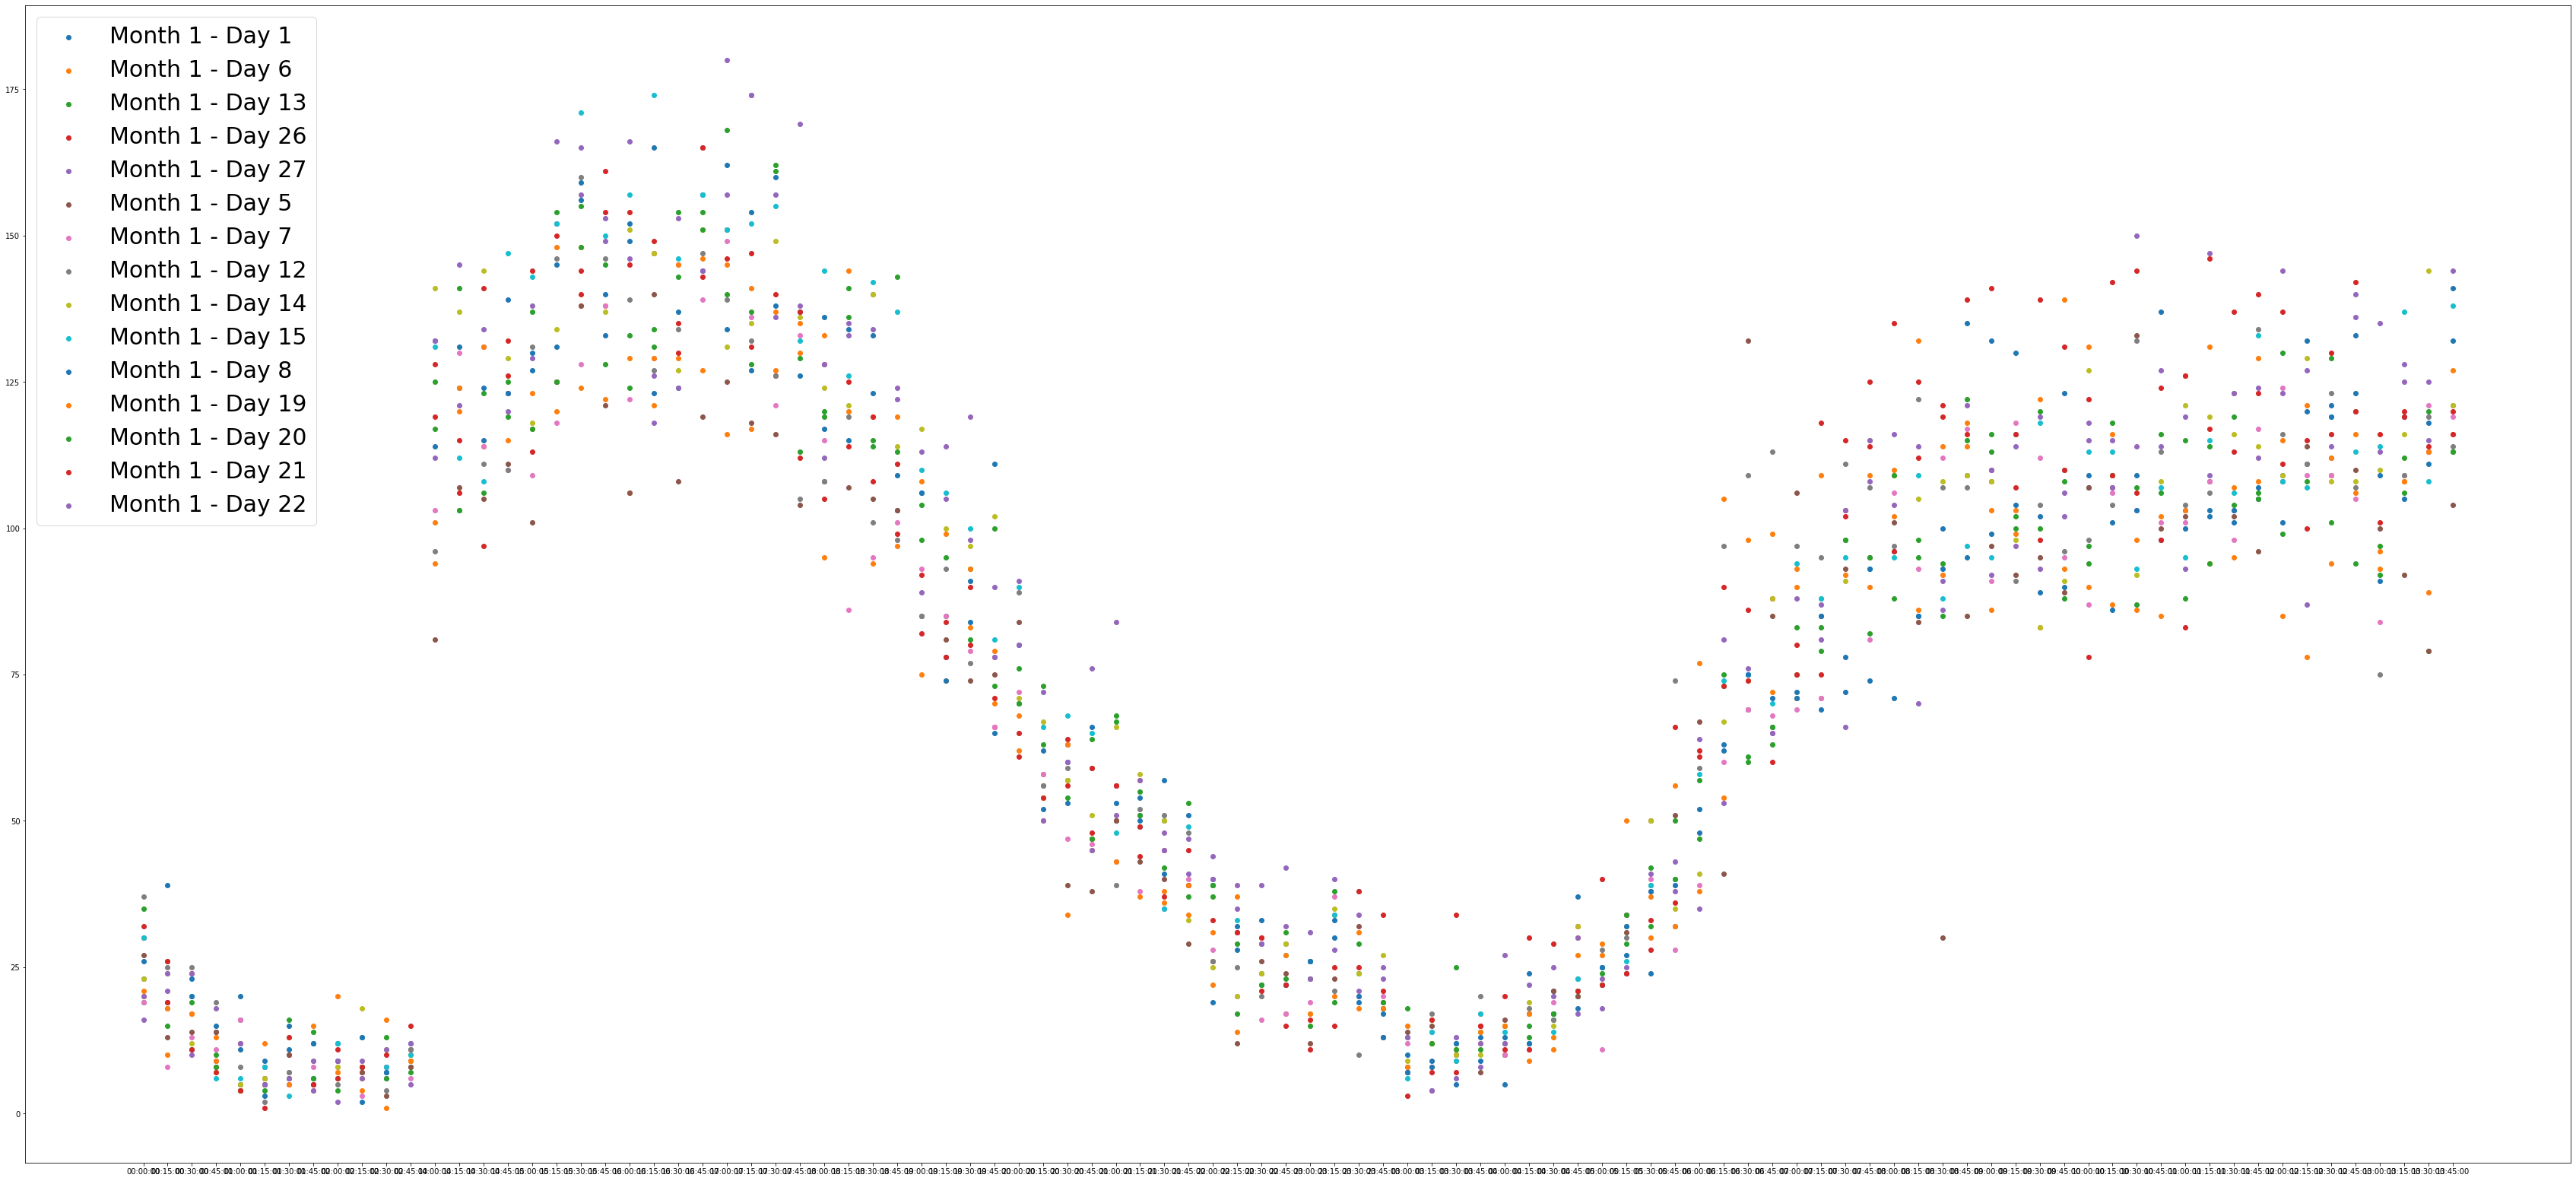

In [49]:
plt.figure(figsize=(60,28))
for day in days_code1_month2:
    plt.scatter(df_month_2.loc[df_month_2.FECHA.dt.day==day].index,
                df_month_2.loc[df_month_2.FECHA.dt.day==day].TOTAL_VEHICULOS,
                marker='o',
                label=str("Month 1 - Day " + str(day)))
plt.legend(loc='best',  fontsize=30)
plt.show()

### MES 3 - MARZO

#### Comparamos los dias del segmento 1  con mismo codigo laboralidad 1 - MES 3

In [50]:
rows_per_day=int(((60/15)*24))
df_month_3=df_cod1_seg1.loc[df_cod1_seg1.FECHA.dt.month==3]
days_in_month3 = df_month_3.count()[0]/rows_per_day # dias con código laboralidad 1 en el mes 1
days_code1_month3=(df_month_3.FECHA.dt.day).unique()

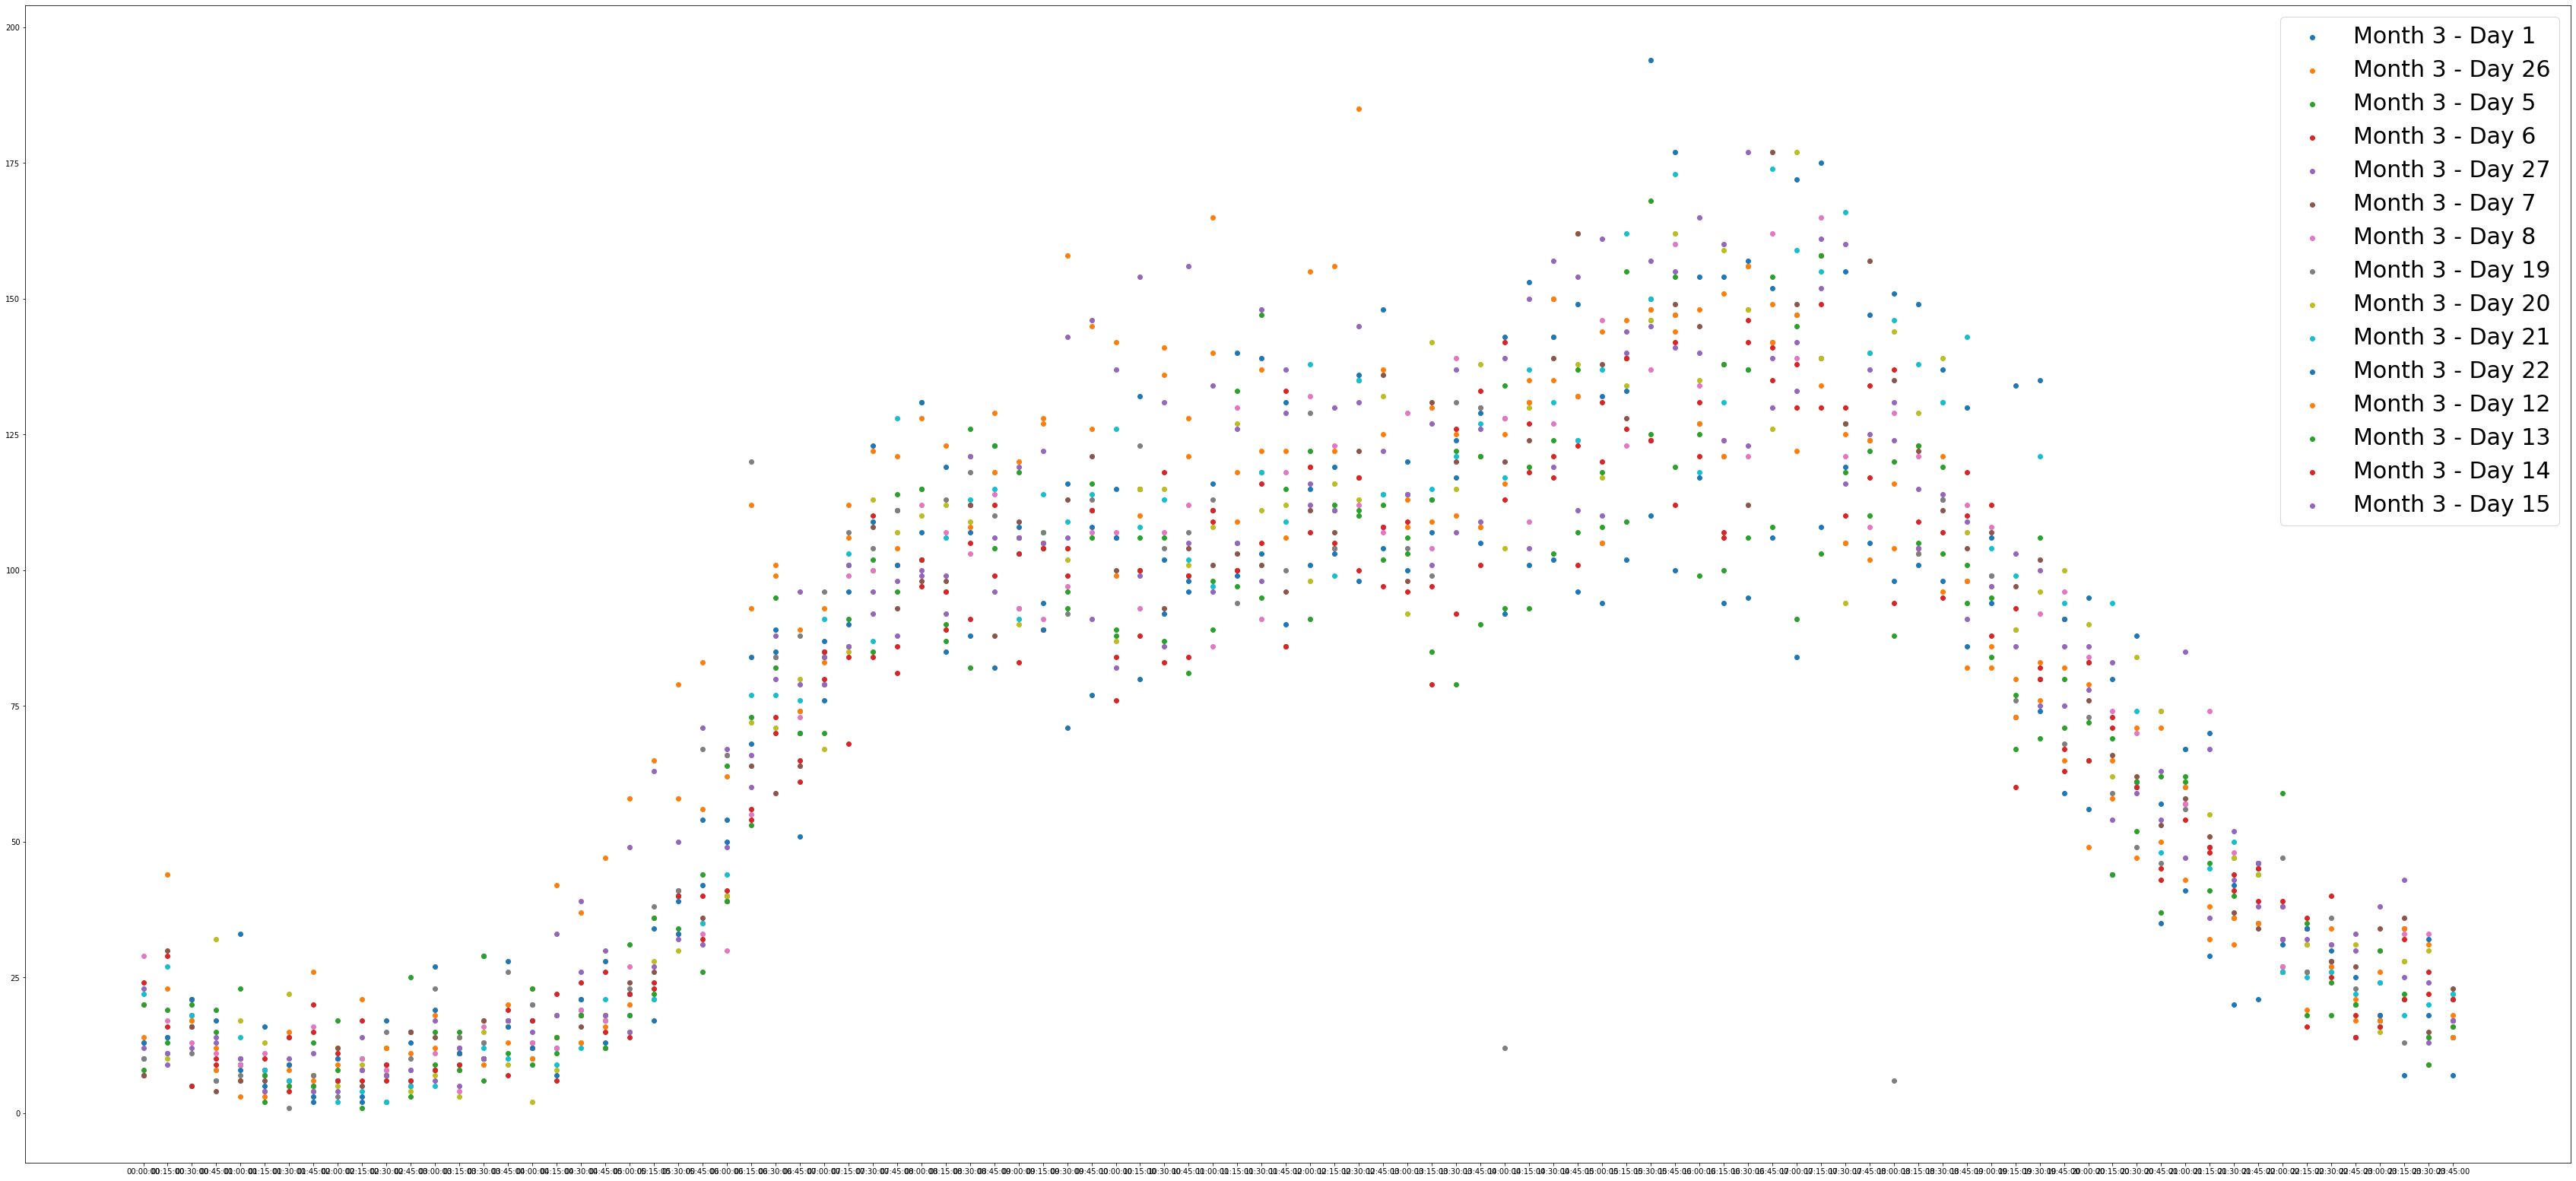

In [51]:
plt.figure(figsize=(60,28))
for day in days_code1_month3:
    plt.scatter(df_month_3.loc[df_month_3.FECHA.dt.day==day].index,
                df_month_3.loc[df_month_3.FECHA.dt.day==day].TOTAL_VEHICULOS,
                marker='o', label=str("Month 3 - Day " + str(day)))
plt.legend(loc='best',  fontsize=30)
plt.show()

La curva característica para el segmento 1 mismo código de laboralidad 1 parece que varía considerablemente de un mes para otro. Sin embargo, dentro del mismo mes parece mantenerse el patron de distribución.

<Figure size 4320x2016 with 0 Axes>

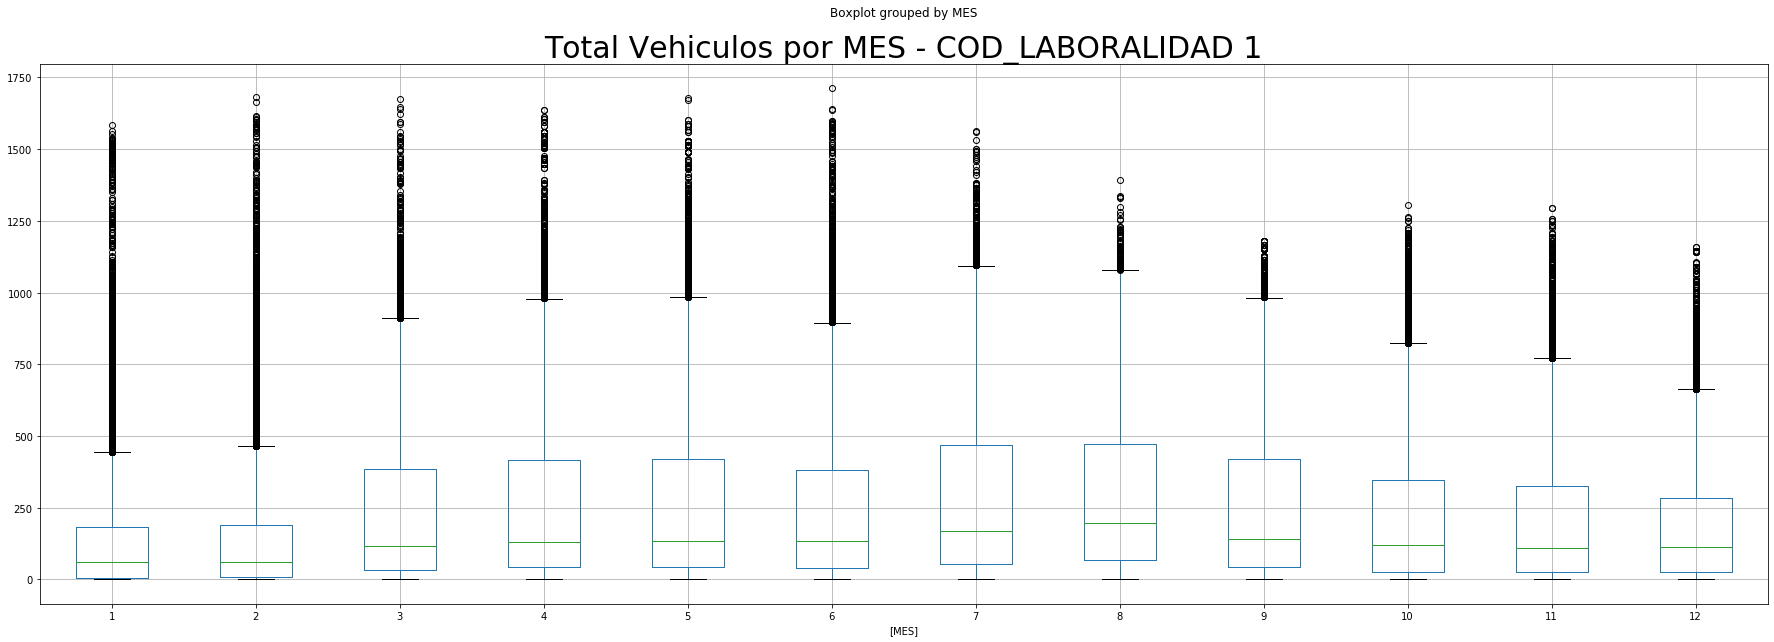

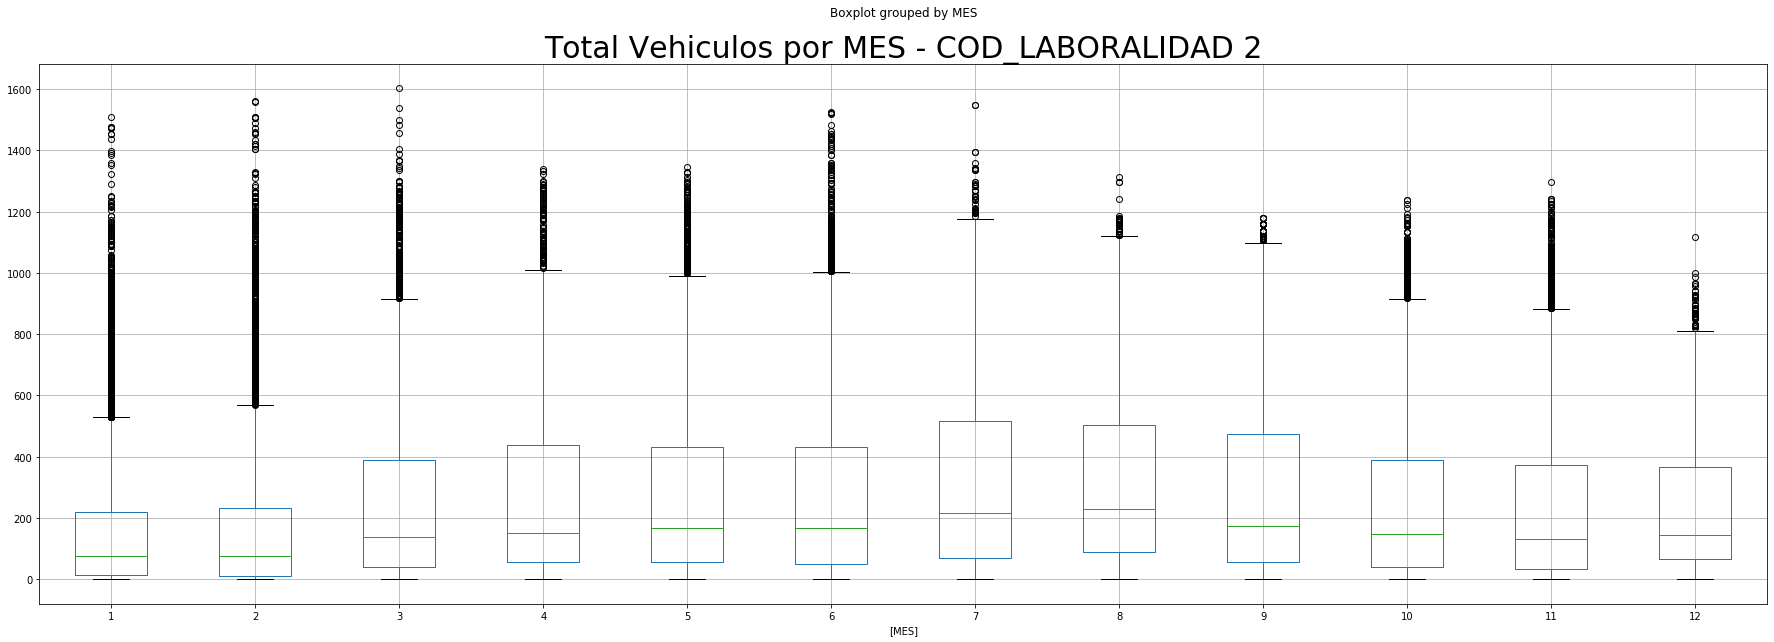

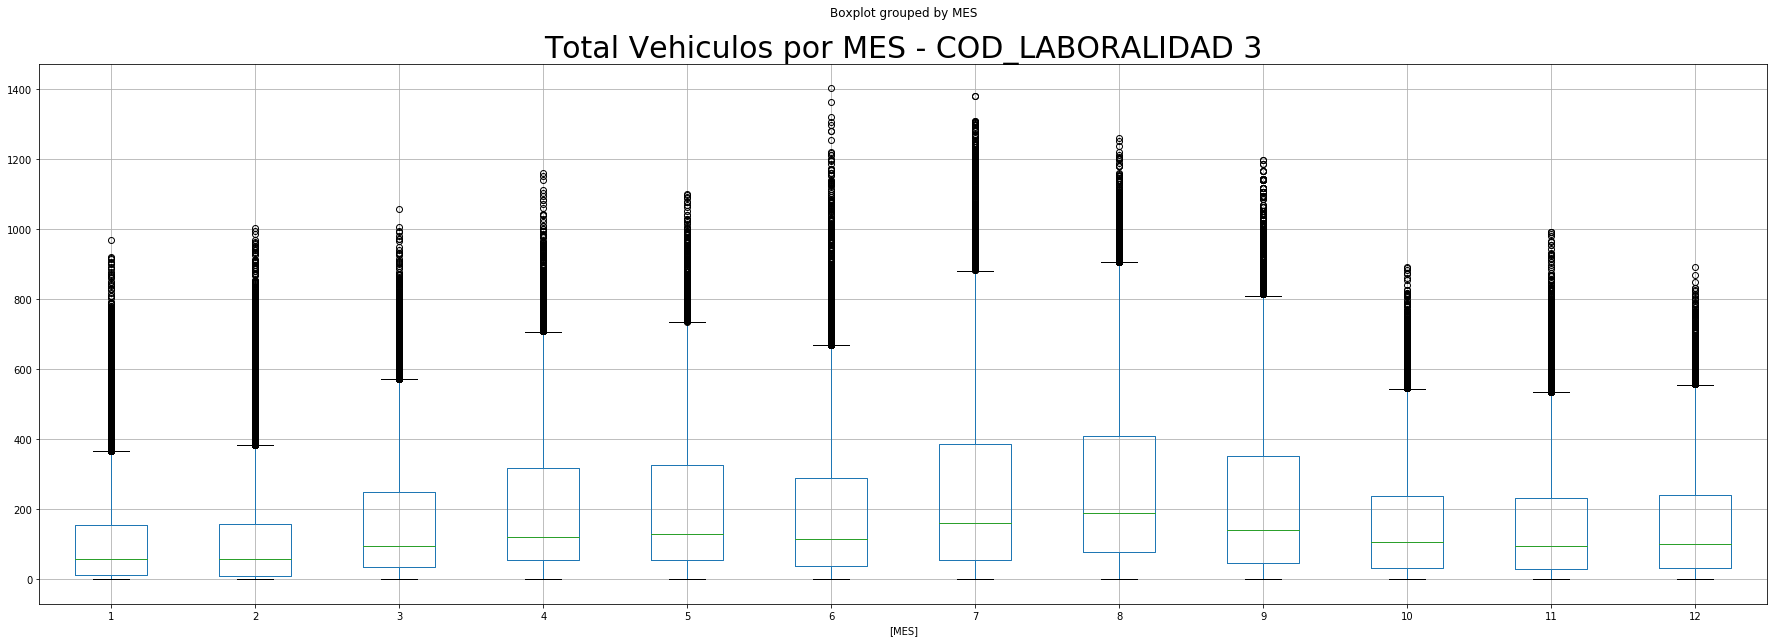

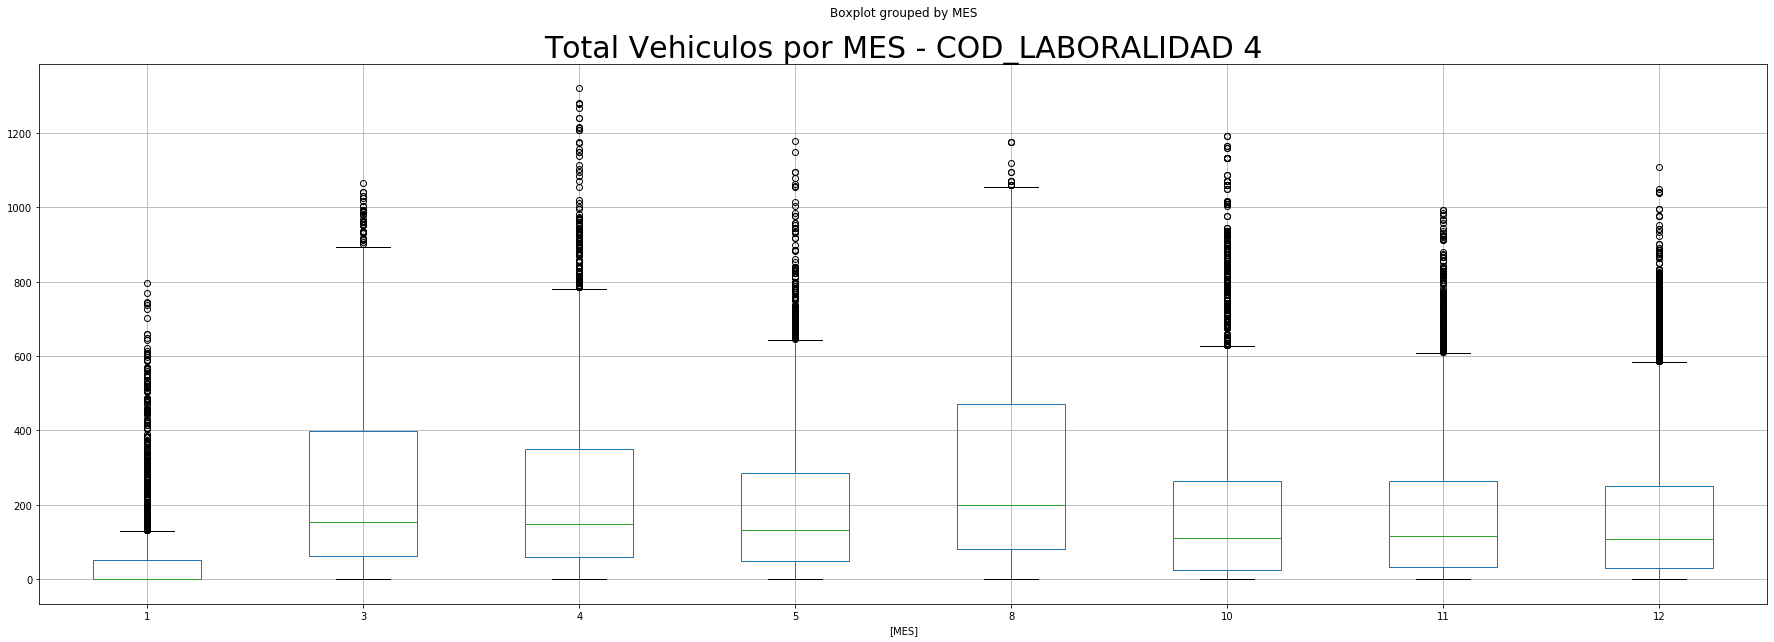

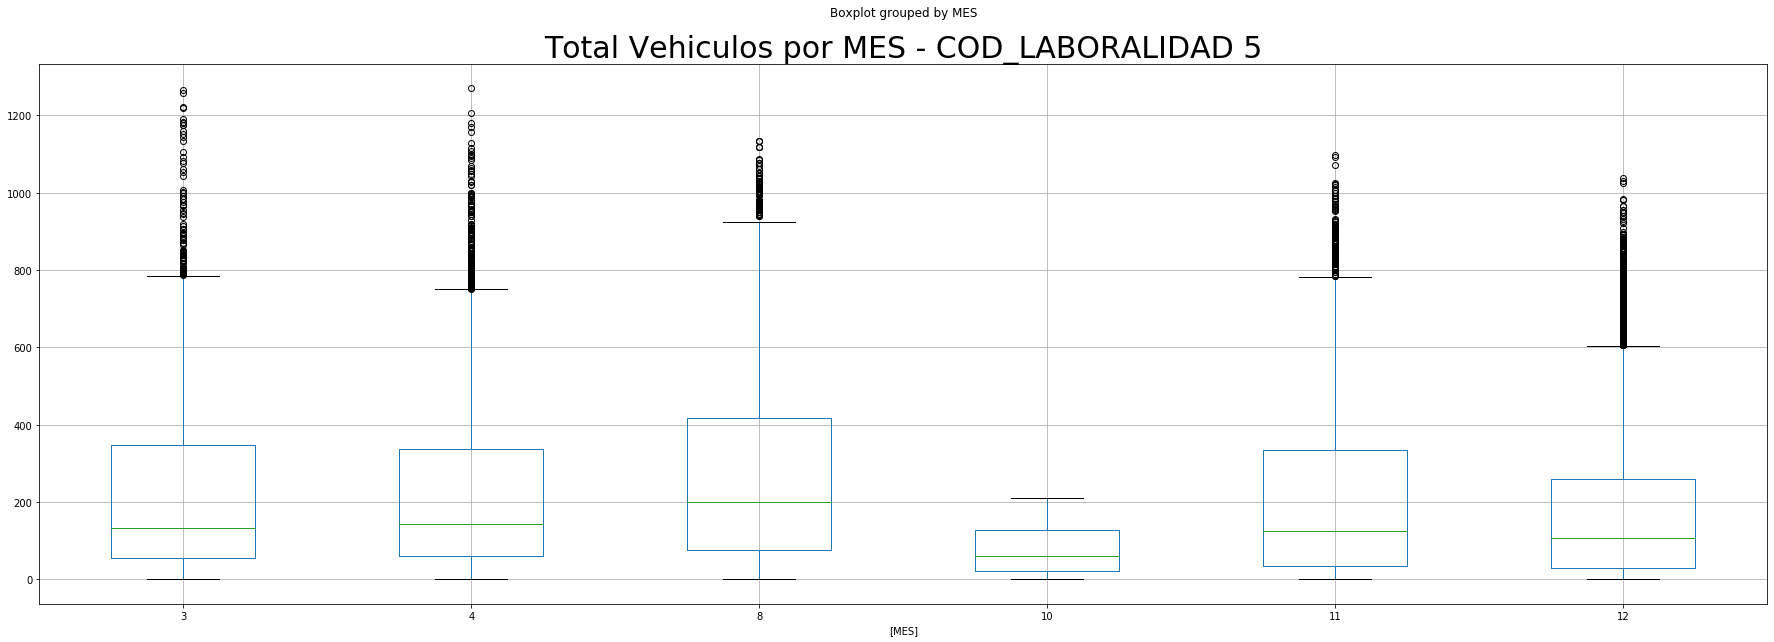

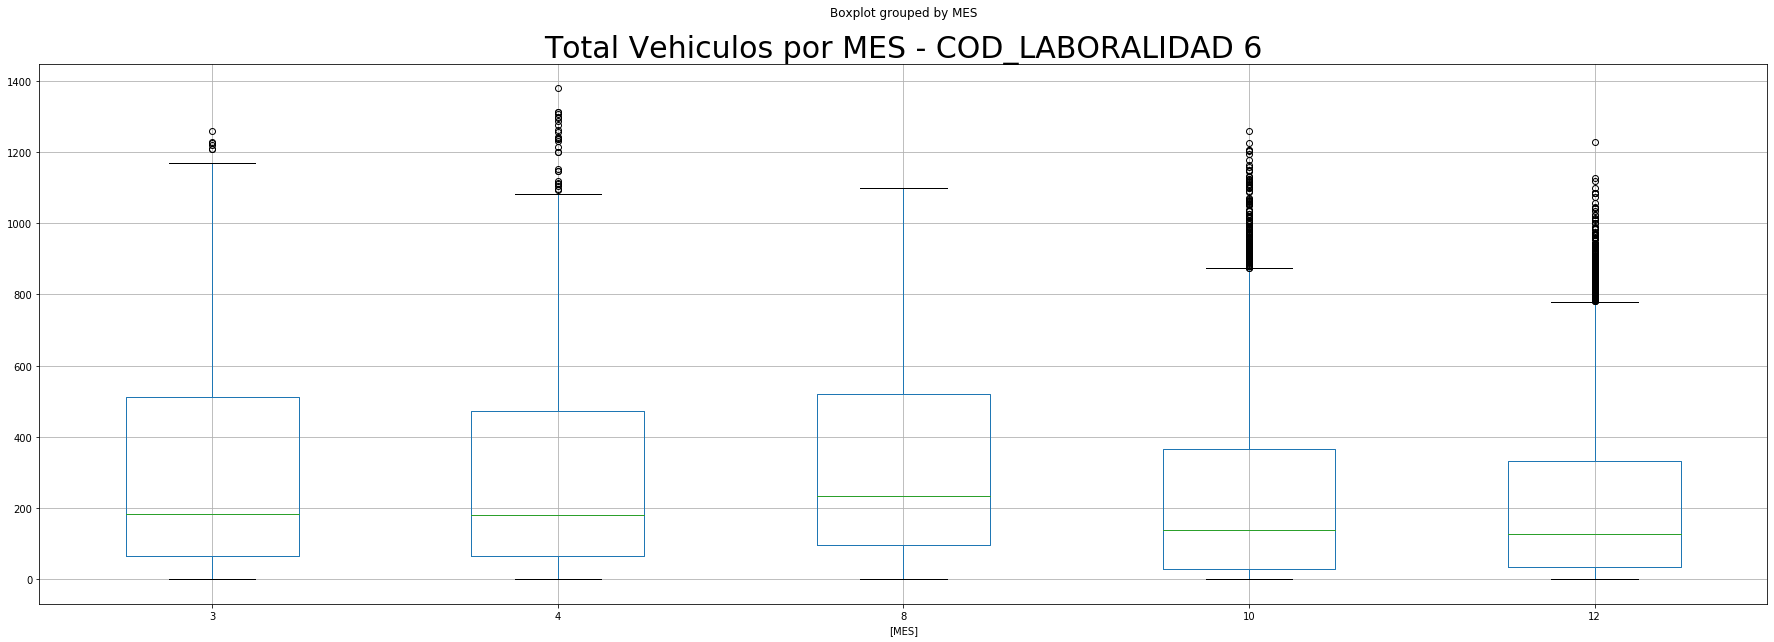

ValueError: not enough values to unpack (expected 2, got 0)

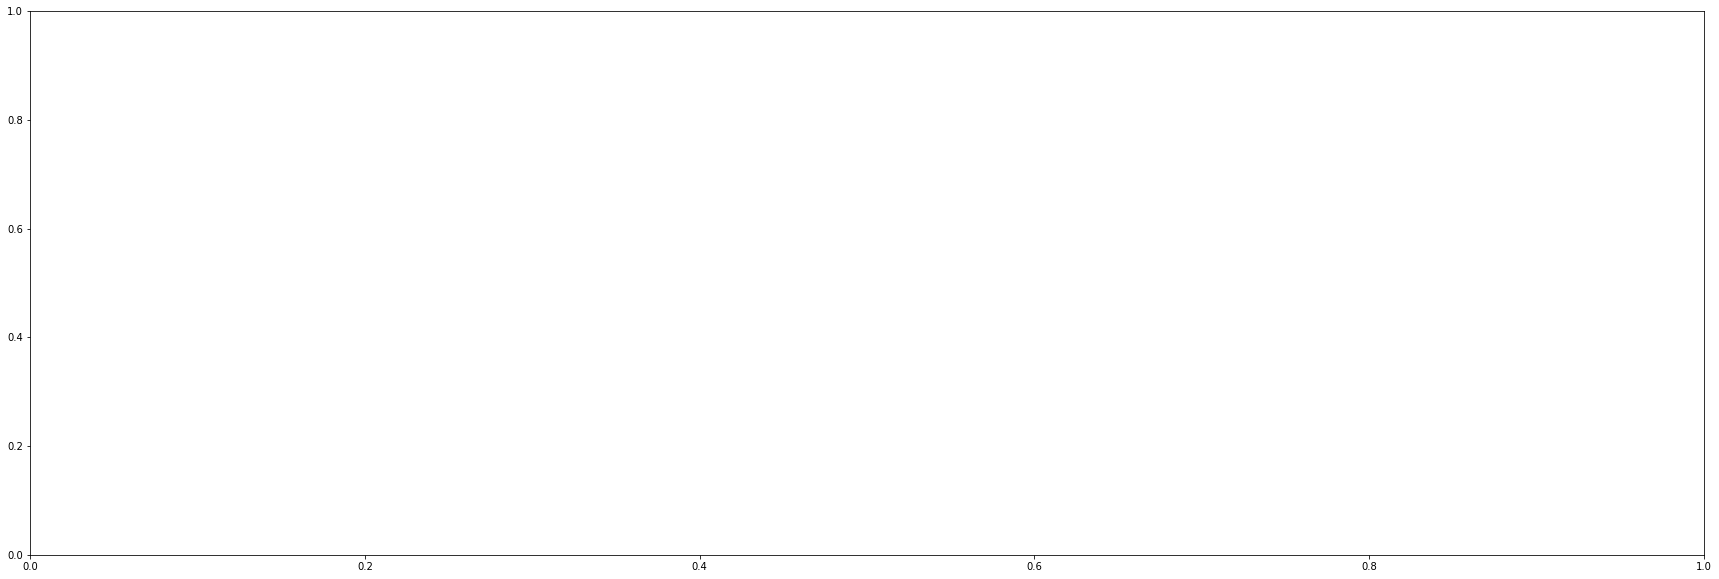

In [53]:
plt.figure(figsize=(60,28))
for i in range(1,8):
    df.loc[df['COD_LABORALIDAD']==i].boxplot(column=('TOTAL_VEHICULOS'), by=["MES"], figsize=(30,10))
    plt.title('Total Vehiculos por MES - COD_LABORALIDAD ' + str(i),  fontsize=30)
    plt.show()

## Exploratory Data Analysis - holiday banks in Spain

In [54]:
def get_holidays_dataset(nyear):
    """ This methods will give the bank holidays for a specific year

    Args:
        nyear (int): the year

    Returns:
        es_holidays(obj): A obj with the list of days

    """
    es_holidays = holidays.ES(years=nyear).items()
    return es_holidays

In [56]:
es_holidays = get_holidays_dataset(2018)

In [57]:
data_input.show(2)

+----------+---------------+-------------------+---+----+------+-------------+---------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|ID_SEGMENT|COD_LABORALIDAD|              FECHA|MES|HORA|MINUTO|CANTIDAD_PREC|TOTAL_VEHICULOS|TOTAL_VEHICULOS_1|TOTAL_VEHICULOS_2|TOTAL_VEHICULOS_3|TOTAL_VEHICULOS_4|TOTAL_VEHICULOS_5|TOTAL_VEHICULOS_6|TOTAL_VEHICULOS_7|TOTAL_VEHICULOS_8|TOTAL_VEHICULOS_9|TOTAL_VEHICULOS_10|TOTAL_VEHICULOS_11|TOTAL_VEHICULOS_12|TOTAL_VEHICULOS_13|TOTAL_VEHICULOS_14|TOTAL_VEHICULOS_15|TOTAL_VEHICULOS_16|TOTAL_VEHICULOS_17|TOTAL_VEHICULOS_18|TOTAL_VEHICULOS_19|TOTAL_VEHICU

In [58]:
df = data_input.toPandas()

In [60]:
es_holidays

dict_items([(datetime.date(2018, 1, 1), 'Año nuevo'), (datetime.date(2018, 1, 6), 'Epifanía del Señor'), (datetime.date(2018, 8, 15), 'Asunción de la Virgen'), (datetime.date(2018, 10, 12), 'Día de la Hispanidad'), (datetime.date(2018, 11, 1), 'Todos los Santos'), (datetime.date(2018, 12, 6), 'Día de la constitución Española'), (datetime.date(2018, 12, 8), 'La Inmaculada Concepción'), (datetime.date(2018, 12, 25), 'Navidad')])

In [61]:
df['FECHA'].dt.strftime('%m-%d-%Y')

0          01-01-2018
1          01-01-2018
2          01-01-2018
3          01-01-2018
4          01-01-2018
              ...    
1390507    12-04-2018
1390508    12-04-2018
1390509    12-04-2018
1390510    12-04-2018
1390511    12-04-2018
Name: FECHA, Length: 1390512, dtype: object

In [63]:
es_holidays = [ptr[0] for ptr in holidays.ES(years=2018).items()]
print(es_holidays)
df_holidays=data_input.loc[pd.to_datetime(data_input['FECHA']).isin(es_holidays)][['SEGMENTO','FECHA','INTENSIDAD_TR']]

[datetime.date(2018, 1, 1), datetime.date(2018, 1, 6), datetime.date(2018, 8, 15), datetime.date(2018, 10, 12), datetime.date(2018, 11, 1), datetime.date(2018, 12, 6), datetime.date(2018, 12, 8), datetime.date(2018, 12, 25)]


AttributeError: 'DataFrame' object has no attribute 'loc'

In [146]:
df_holidays.count()

SEGMENTO         240
FECHA            240
INTENSIDAD_TR    240
dtype: int64

In [148]:
df_holidays.head(10)

,SEGMENTO,FECHA,INTENSIDAD_TR
0,1,2018-01-01,109
480,1,2018-01-06,483
2977,2,2018-01-01,86
3457,2,2018-01-06,228
5954,3,2018-01-01,72
6434,3,2018-01-06,156
8931,4,2018-01-01,65
9411,4,2018-01-06,143
11908,5,2018-01-01,40
12388,5,2018-01-06,105


In [149]:
df_holidays.to_csv('anual_holidays.csv')